<a href="https://colab.research.google.com/github/aenoboa1/Draft_ML_EmotionAPP/blob/main/testing_daisee_ResTCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install visualkeras

     |████████████████████████████████| 795 kB 7.0 MB/s 


In [3]:
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from google.colab import drive
import visualkeras
drive._mount('/content/drive')


#matplotlib styles
plt.style.use(['ggplot'])
sns.set(rc={'figure.figsize':(11.7,8.27)})

Mounted at /content/drive


In [ ]:
!mkdir /content/DAiSEE ; unzip  -qq /content/drive/MyDrive/DATA/datasets/DAiSEE.zip -d /content/DAiSEE


In [ ]:
# SSH Tunnel para abrir en VS Code
!pip install colab_ssh --upgrade

from colab_ssh import launch_ssh
launch_ssh('21v23nE9rkUZAwWwJZ1zAxGLuwK_7v2uhNRStUAsGmaEtCm5D', 'ml')

we highly recommend that update your code by following this documentation https://github.com/WassimBenzarti/colab-ssh#getting-started
Successfully running 6.tcp.ngrok.io:10394
[Optional] You can also connect with VSCode SSH Remote extension using this configuration:

  Host google_colab_ssh
    HostName 6.tcp.ngrok.io
    User root
    Port 10394
    


In [ ]:
class_names = ['Boredom',
               'Engagement',
              'Confusion',
               'Frustration'
               ]


In [ ]:
df_train = pd.read_csv('/content/DAiSEE/DAiSEE/Labels/TrainLabels.csv')


In [ ]:
df_train

,ClipID,Boredom,Engagement,Confusion,Frustration
0,1100011002.avi,0,2,0,0
1,1100011003.avi,0,2,0,0
2,1100011004.avi,0,3,0,0
3,1100011005.avi,0,3,0,0
4,1100011006.avi,0,3,0,0
...,...,...,...,...,...
5353,4599990246.avi,0,3,0,0
5354,4599990247.avi,0,3,0,0
5355,4599990248.avi,1,2,1,1
5356,4599990249.avi,0,3,0,0


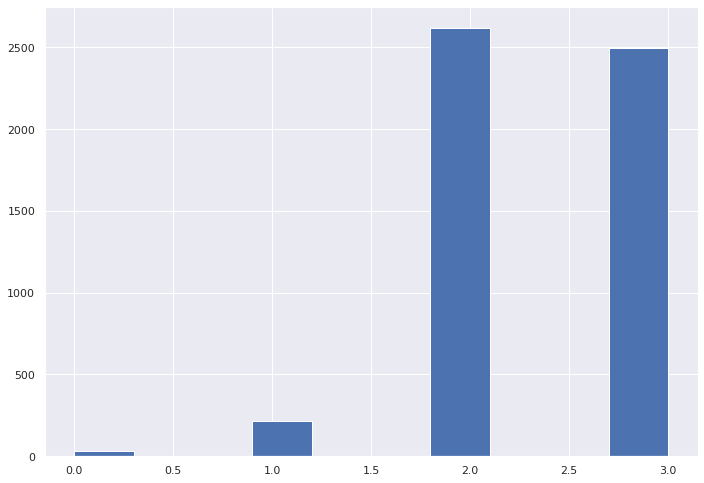

In [ ]:
df_train['Engagement'].hist()


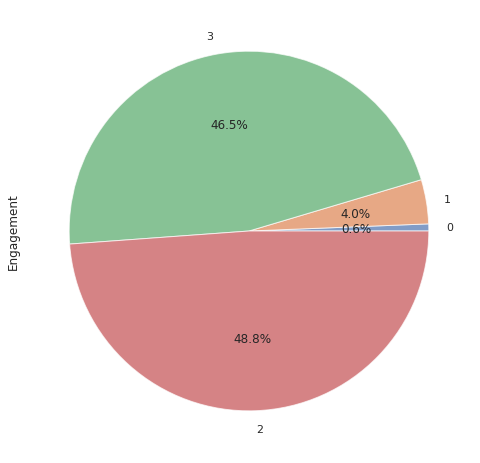

In [ ]:
df_train['Engagement'].value_counts().sort_values().plot.pie(wedgeprops={'alpha':0.7}, autopct='%1.1f%%')


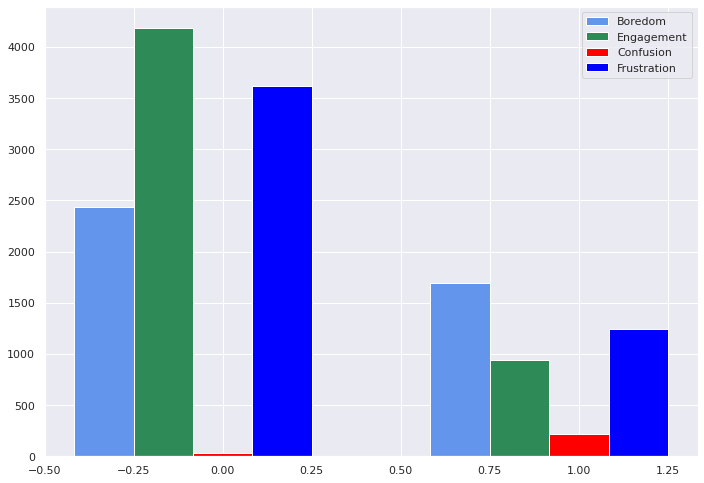

In [ ]:


fig, ax = plt.subplots()

d_heights, d_bins = np.histogram(df_train['Boredom'],bins=[-0.5,0.5,1.5])
m_heights, m_bins = np.histogram(df_train['Frustration '], bins=d_bins)
s_heights, s_bins = np.histogram(df_train['Engagement'], bins=m_bins)
ss_heights, ss_bins = np.histogram(df_train['Confusion'], bins=s_bins)


width = (d_bins[1] - d_bins[0])/6.0

ax.bar(d_bins[:-1]+width, d_heights, width=width, facecolor='cornflowerblue')
ax.bar(m_bins[:-1]+width*2, m_heights, width=width, facecolor='seagreen')
ax.bar(s_bins[:-1]+width*3, s_heights, width=width, facecolor='red')
ax.bar(ss_bins[:-1]+width*4, ss_heights, width=width, facecolor='blue')
ax.legend(class_names)


#### Aplicando la tecnica SMOTE al dataset

- [ ] TODO

In [ ]:
df_train["Engagement"].value_counts()

2    2617
3    2494
1     213
0      34
Name: Engagement, dtype: int64

In [ ]:
count_class_2, count_class_3,count_class_1,count_class_0 = df_train["Engagement"].value_counts()

In [ ]:
count_class_2

2617

In [ ]:
count_class1

213

To install imbalanced-learn library use pip install imbalanced-learn command



In [ ]:
!pip install imbalanced-learn

### Testing predictions

In [ ]:
model.compile()

In [ ]:
from keras.models import load_model

model =load_model('/content/checkpoints/Epoch_0_model.hp5')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 96)      14208     
                                                                 
 re_lu (ReLU)                (None, 112, 112, 96)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 256)       614656    
                                                                 
 re_lu_1 (ReLU)              (None, 37, 37, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 256)      0         
 2D)                                                    

In [ ]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (224, 224, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load('/content/DAiSEE/DAiSEE/DataSet/Data/Train/310082/3100821015/310082101534.jpg')

In [ ]:
image

array([[[[0.7294118 , 0.6862745 , 0.7176471 ],
         [0.7294118 , 0.6862745 , 0.7176471 ],
         [0.7294118 , 0.6862745 , 0.7176471 ],
         ...,
         [0.7890167 , 0.72235006, 0.7537226 ],
         [0.7882354 , 0.72156876, 0.7529413 ],
         [0.7882353 , 0.72156864, 0.7529412 ]],

        [[0.7294118 , 0.6862745 , 0.7176471 ],
         [0.7294118 , 0.6862745 , 0.7176471 ],
         [0.7294118 , 0.6862745 , 0.7176471 ],
         ...,
         [0.7890167 , 0.72235006, 0.7537226 ],
         [0.7882354 , 0.72156876, 0.7529413 ],
         [0.7882353 , 0.72156864, 0.7529412 ]],

        [[0.7294118 , 0.6862745 , 0.7176471 ],
         [0.7294118 , 0.6862745 , 0.7176471 ],
         [0.7294118 , 0.6862745 , 0.7176471 ],
         ...,
         [0.7890167 , 0.72235006, 0.7537226 ],
         [0.7882354 , 0.72156876, 0.7529413 ],
         [0.7882353 , 0.72156864, 0.7529412 ]],

        ...,

        [[0.19215687, 0.26666668, 0.39607844],
         [0.19215798, 0.2666678 , 0.39607957]

In [ ]:
model.predict(image)

array([[1.3776677e-06, 9.9999857e-01, 3.2351309e-18, 0.0000000e+00]],
      dtype=float32)

### Method 2 : RESNET+ TCN 


#### Code Description:

The input is training and validation raw frames extracted from videos and placed in separate folders (using `extractFramesOpenCV.py`). The address of the folders (containing video frames) and corresponding labels should be provided in two csv files, train.csv and validation.csv as follows
 
```python
path,label
/home/videos/train/826412/8264120240/,0
/home/videos/train/510034/5100342024/,1
/home/videos/train/500067/5000671065/,2
...
```

`datasets.py` and `transforms.py` read the video frames based on their address in the csv files, preprocess and normalize them, and convert them to [PyTorch dataloaders](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

The ResNet-TCN Hybrid Architecture is in `ResTCN.py`. In the class `ResTCN` and the function `forward`, [resnet18](https://pytorch.org/vision/0.8/models.html#torchvision.models.resnet18) extracts features from consecutive frames of video, and [TCN](https://github.com/locuslab/TCN) analyzes changes in the extracted features, and fully-connected layers output the final prediction.

Training and validation phases are performed in `train.py`. Training the ResNet and TCN is performed jointly using [Adam](https://pytorch.org/docs/stable/optim.html) optimization algorithm.

The input to the ResTCN model should have this format: inputs = torch.randn([batch_size, sequence_length, num_channels, frame_width, frame_height]), for instance

```
import torch
from ResTCN import ResTCN
model = ResTCN().cuda()
inputs = torch.randn([16, 30, 3, 256, 256]).cuda()
outputs = model(inputs)
```

The code has been tested on the [DAiSEE](https://iith.ac.in/~daisee-dataset/), Dataset for Affective States in E-Environments, for engagement level classification in online classrooms.



Da

In [5]:
!mkdir DAiSEE2 ; unzip  -qq /content/drive/MyDrive/DATA/datasets/DAiSEE2.zip -d DAiSEE2

In [6]:
!git clone https://github.com/aenoboa1/Draft_ML_EmotionAPP

Cloning into 'Draft_ML_EmotionAPP'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 148 (delta 51), reused 5 (delta 1), pack-reused 44
Receiving objects: 100% (148/148), 18.31 MiB | 7.18 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [8]:
!git clone https://github.com/aenoboa1/ResNet-TCN

Cloning into 'ResNet-TCN'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 207 (delta 7), reused 0 (delta 0), pack-reused 188
Receiving objects: 100% (207/207), 2.65 MiB | 21.38 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [ ]:
!python /content/ResNet-TCN/extractFramesOpenCV.py

In [7]:
import torch
import torchvision
import cv2
import os


class VideoFolderPathToTensor(object):

    def __init__(self, max_len=None):
        self.max_len = max_len

    def __call__(self, path):

        file_names = sorted([os.path.join(path, f) for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
        frames_path = [os.path.join(path, f) for f in file_names]

        frame = cv2.imread(frames_path[0])
        height, width, channels = frame.shape
        num_frames = len(frames_path)

        transform = torchvision.transforms.Compose([
            torchvision.transforms.ToPILImage(),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            torchvision.transforms.Resize([224, 224])
        ])

        # EXTRACT_FREQUENCY = 18
        EXTRACT_FREQUENCY = 1

        # num_time_steps = int(num_frames / EXTRACT_FREQUENCY)

        num_time_steps = 16
        # num_time_steps = 4

        # (3 x T x H x W), https://pytorch.org/docs/stable/torchvision/models.html
        frames = torch.FloatTensor(channels, num_time_steps, 224, 224)

        for index in range(0, num_time_steps):
            frame = cv2.imread(frames_path[index * EXTRACT_FREQUENCY])
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = torch.from_numpy(frame)
            frame = frame.permute(2, 0, 1)  # (H x W x C) to (C x H x W)
            frame = frame / 255
            if frame.shape[2] != 224:
                frame = frame[:, :, 80:560]
            frame = transform(frame)
            frames[:, index, :, :] = frame.float()

        return frames.permute(1, 0, 2, 3)


In [9]:
from torch.utils.data import Dataset
import pandas as pd
import os


class VideoDataset(Dataset):

    def __init__(self, csv, root, transform=None):

        self.dataframe = pd.read_csv(csv)
        self.transform = transform
        self.root = root

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):

        label = self.dataframe.iloc[index].label
        video = os.path.join(self.root, self.dataframe.iloc[index].path)
        video = self.transform(video)

        return video, label


In [10]:
import torchvision
from torch.utils.data import DataLoader


def generate_dataloader(batch_size, csv, root):
    dataset = VideoDataset(csv,
                          root,
                          transform=torchvision.transforms.Compose([VideoFolderPathToTensor()]))

    return DataLoader(dataset,
                      batch_size=batch_size,
                      shuffle=True,
                      num_workers=4)



In [11]:
def get_dataloader(batch_size, csv_train, root_train, csv_test, root_test):
    return {
        'train': generate_dataloader(batch_size, csv_train, root_train),
        'test': generate_dataloader(batch_size, csv_test, root_test)}

In [ ]:
import os
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm
import torch
from torch import nn, optim
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

import numpy as np


torch.manual_seed(0)
num_epochs = 100
batch_size = 4
lr = .001
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")
print("Device being used:", device, flush=True)



In [13]:
dataloader = get_dataloader(batch_size,
                            '/content/Draft_ML_EmotionAPP/pytorch_labels/labels_daisee_train.csv',
                            os.path.join(os.getcwd(), '/content/DAiSEE/DAiSEE/DataSet/Data/Train/'),
                            '/content/Draft_ML_EmotionAPP/pytorch_labels/labels_daisee_test.csv',
                            os.path.join(os.getcwd(), '/content/DAiSEE/DAiSEE/DataSet/Data/Test/'))

dataset_sizes = {x: len(dataloader[x].dataset) for x in ['train', 'test']}

print(dataset_sizes, flush=True)

{'train': 5358, 'test': 1784}


In [14]:
import torch.nn as nn
from torch.nn.utils import weight_norm

In [15]:

class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super(Chomp1d, self).__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        return x[:, :, :-self.chomp_size].contiguous()


class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, padding, dropout=0.2):
        super(TemporalBlock, self).__init__()
        self.conv1 = weight_norm(nn.Conv1d(n_inputs, n_outputs, kernel_size,
                                           stride=stride, padding=padding, dilation=dilation))
        self.chomp1 = Chomp1d(padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = weight_norm(nn.Conv1d(n_outputs, n_outputs, kernel_size,
                                           stride=stride, padding=padding, dilation=dilation))
        self.chomp2 = Chomp1d(padding)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        self.net = nn.Sequential(self.conv1, self.chomp1, self.relu1, self.dropout1,
                                 self.conv2, self.chomp2, self.relu2, self.dropout2)
        self.downsample = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
        self.relu = nn.ReLU()
        self.init_weights()

    def init_weights(self):
        self.conv1.weight.data.normal_(0, 0.01)
        self.conv2.weight.data.normal_(0, 0.01)
        if self.downsample is not None:
            self.downsample.weight.data.normal_(0, 0.01)

    def forward(self, x):
        out = self.net(x)
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)


class TemporalConvNet(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TemporalConvNet, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i - 1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1, dilation=dilation_size,
                                     padding=(kernel_size - 1) * dilation_size, dropout=dropout)]

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

In [16]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()

    def forward(self, x):
        return x


class ResTCN(nn.Module):
    def __init__(self):
        super(ResTCN, self).__init__()

        self.spatial_feat_dim = 32
        self.num_classes = 4
        self.nhid = 128
        self.levels = 8
        self.kernel_size = 7
        self.dropout = .1
        self.channel_sizes = [self.nhid] * self.levels

        self.tcn = TemporalConvNet(
            self.spatial_feat_dim,
            self.channel_sizes,
            kernel_size=self.kernel_size,
            dropout=self.dropout)
        self.linear = nn.Linear(self.channel_sizes[-1], self.num_classes)

        self.model_conv = torchvision.models.resnet18(pretrained=True)
        # for param in self.model_conv.parameters():
        #     param.requires_grad = False

        num_ftrs = self.model_conv.fc.in_features
        # self.model_conv.fc = nn.Linear(num_ftrs, 4)
        self.model_conv.fc = nn.Linear(num_ftrs, self.spatial_feat_dim)
        # self.model_conv.fc = Identity()

        # self.rnn = nn.LSTM(self.spatial_feat_dim, 64, 1, batch_first=True)
        # self.linear = nn.Linear(64, 4)

    def forward(self, data):
        # t = 0
        # x = data[:, t, :, :, :]
        # output = self.model_conv(x)

        z = torch.zeros([data.shape[0], data.shape[1], self.spatial_feat_dim]).cuda()
        for t in range(data.size(1)):
            x = self.model_conv(data[:, t, :, :, :])
            z[:, t, :] = x

        # y, _ = self.rnn(z)
        # output = self.linear(torch.sum(y, dim=1))

        z = z.transpose(1, 2)
        y = self.tcn(z)
        # output = self.linear(y[:, :, -1])
        output = self.linear(torch.sum(y, dim=2))

        return output

In [ ]:
from torch.utils.tensorboard import SummaryWriter


model = ResTCN().to(device)
# optimizer = optim.Adam(model.parameters(), lr=lr)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
scheduler = StepLR(optimizer, step_size=50, gamma=.1)

criterion = nn.CrossEntropyLoss().to(device)
softmax = nn.Softmax(dim=1)

for epoch in range(num_epochs):
    for phase in ['train', 'test']:
        running_loss = .0
        y_trues = np.empty([0])
        y_preds = np.empty([0])
        
        comment = f' batch_size = {batch_size} lr = {lr} '
        tb = SummaryWriter(comment=comment)

        if phase == 'train':
            model.train()
        else:
            model.eval()

        for inputs, labels in tqdm(dataloader[phase], disable=True):
            inputs = inputs.to(device)
            labels = labels.long().squeeze().to(device)

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs).squeeze()
                loss = criterion(outputs, labels)

                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            preds = torch.max(softmax(outputs), 1)[1]
            y_trues = np.append(y_trues, labels.data.cpu().numpy())
            y_preds = np.append(y_preds, preds.cpu())

        # if phase == 'train':
        #     scheduler.step()

        epoch_loss = running_loss / dataset_sizes[phase]
        print("[{}] Epoch: {}/{} Loss: {} LR: {}".format(
            phase, epoch + 1, num_epochs, epoch_loss, scheduler.get_last_lr()), flush=True)
        print('\naccuracy\t' + str(accuracy_score(y_trues, y_preds)))
        print('\nconfusion matrix\n' + str(confusion_matrix(y_trues, y_preds)))
        
        tb.add_scalar("Loss", epoch_loss, epoch)
        tb.add_scalar("Accuracy", accuracy_score(y_trues, y_preds), epoch)

        if ((epoch + 1)% 5 == 0 and phase == 'train'):
            PATH = ("/content/Draft_ML_EmotionAPP/model_Torch/model_epoch_{}_acc_{}.pt".format(epoch + 1,str(accuracy_score(y_trues, y_preds))))
            torch.save(model.state_dict(),PATH)
tb.close()


[train] Epoch: 1/30 Loss: 0.8931150203469909 LR: [0.001]

accuracy	0.5151175811870101

confusion matrix
[[   0    0   26    8]
 [   0    0  141   72]
 [   0    6 1629  982]
 [   0    1 1362 1131]]
[test] Epoch: 1/30 Loss: 0.8601437908651582 LR: [0.001]

accuracy	0.547085201793722

confusion matrix
[[  0   0   3   1]
 [  0   0  50  34]
 [  0   0 727 155]
 [  0   0 565 249]]
[train] Epoch: 2/30 Loss: 0.8584110057256078 LR: [0.001]

accuracy	0.5466592011944755

confusion matrix
[[   0    0   26    8]
 [   0    2  136   75]
 [   0    1 1605 1011]
 [   0    1 1171 1322]]
[test] Epoch: 2/30 Loss: 1.2487445200371636 LR: [0.001]

accuracy	0.4938340807174888

confusion matrix
[[  0   0   4   0]
 [  0   0  83   1]
 [  0   0 881   1]
 [  0   0 814   0]]
[train] Epoch: 3/30 Loss: 0.8489703578528917 LR: [0.001]

accuracy	0.5714818962299365

confusion matrix
[[   0    0   30    4]
 [   0    1  168   44]
 [   0    0 1885  732]
 [   0    1 1317 1176]]
[test] Epoch: 3/30 Loss: 0.9014475796321583 LR: [0

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir /content/runs

## Test Predictions Pytorch RESTCN